## CS-613: Machine Learning
## HW2
### John Obuch

#### Part 1: Theory
See PDF write up

#### Part 2: Logistic Regression

Final Model Parameters:
theta_0 = 2.1543094556603073
theta_1 = 3.7971381650736142
theta_2 = -2.5777414859305305


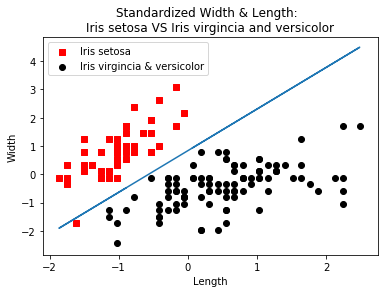

In [1]:
#import module requirements
import numpy as np
import random
from sklearn import datasets as skdata
%matplotlib inline
from matplotlib import pyplot as plt

#read in the data
iris = skdata.load_iris()

#seperate the data into it's X and Y components
X = iris.data[: , :2] 
y = (iris.target != 0) * 1

#reshape y to be a column vector with shape (150,1)
y = np.reshape(y,(y.shape[0],1))

#create a vector of ones for bias feature
bias_feature = np.ones(X.shape[0])

#add the bias feature to the X matrix
X = np.column_stack([bias_feature, X[:, 0:X.shape[1]]])

#compute the mean and std of the X data
X_bar = np.mean(X, axis = 0)
X_std = np.std(X, axis = 0, ddof = 1)

#assign the first element of X_bar to be zero and first elelment of X_std to be 1
X_bar[0] = 0
X_std[0] = 1

#standardize the X data
X_stdz = (X - X_bar)/X_std

#Initialize the parameters of θ using random values in the range [-1, 1]
np.random.seed(1)
theta = np.zeros((X_stdz.shape[1],1))
for x_i in range(X_stdz.shape[1]):
    theta.itemset((x_i,0), np.random.uniform(-1,1))

#define the learning rate Eta
eta = 0.01

#since performing Batch Gradient Decent we need to compute eta/N
#where N here is the size (number of records) of the X matrix
eta_over_N = eta/X.shape[0]

#set the threshold values so we know when to stop
loss_thresh = 2**-23
iter_thresh = 10000

#set values of variables to compare to threshold values
chg_in_loss = .1
prev_loss = 1000

#initialize the iteration count
iter_ = 1

#perform Batch Gradient Decent until convergence criteria is met
while (chg_in_loss > loss_thresh) and (iter_ < iter_thresh):
    
    #compute y_hat and the errors (i.e. the residuals)
    y_hat = 1/(1 + np.exp(np.dot(-X_stdz, theta)))    
    y_err = (y_hat - y)
    
    #update the current loss value
    crnt_loss = (1/y.shape[0])*np.sum(((-y*np.log(y_hat)) - ((1-y)*np.log(1-y_hat))))

    #compute the gradient
    grad = np.dot(X_stdz.T, y_err)
    
    #perform the update of theta
    theta = theta - eta_over_N*grad
    
    #update the change in loss and the previous loss
    chg_in_loss = abs((prev_loss - crnt_loss))
    prev_loss = crnt_loss
    
    #increment the iteration count
    iter_ += 1

#return the final model parameters
print("Final Model Parameters:")
for i, par in enumerate(theta):
    print('theta_' + str(i) + ' = ' + str(par[0]))

#plot the data
for i in range(len(y)):
    if y[i] == 0:
        a = plt.scatter(X_stdz[i,1], X_stdz[i,2], marker = "s", color = "r", label = "Iris setosa")
    elif y[i] == 1:
        b = plt.scatter(X_stdz[i,1], X_stdz[i,2], marker = "o", color = "k", label = "Iris virgincia & versicolor")
        
#compute the equation of the boundary line given by: x2 = -(theta1/theta2)*x1 - (theta0/theta2)
y_boundary = -(theta[1]/theta[2])*X_stdz[:,1] - (theta[0]/theta[2])

#plot the boundary hyperplane
plt.plot(X_stdz[:,1], y_boundary)

#label the plot
plt.title('Standardized Width & Length:  \nIris setosa VS Iris virgincia and versicolor')
plt.xlabel('Length')
plt.legend(handles=[a,b])
plt.ylabel('Width')
plt.show()

#slope of boundary line 1.473
#intersept of boundary line is 0.8357

##### sklearn result comparison

Final Model Parameters:
theta_0 = 69.7372296103425
theta_1 = -30.902052691545933
Bias term = 49.26318047949334


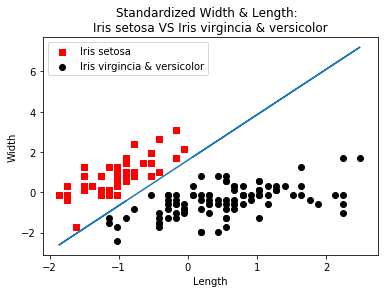

In [2]:
#import module requirement
from sklearn.linear_model import LogisticRegression 

#read in the data
iris = skdata.load_iris()

#seperate the data into it's X and Y components
X = iris.data[: , :2] 
y = (iris.target != 0) * 1

#compute the mean and std of the X data
X_bar = np.mean(X, axis = 0)
X_std = np.std(X, axis = 0, ddof = 1)

#standardize the X data
X_stdz = (X - X_bar)/X_std

#fit the model
lgr = LogisticRegression(penalty='none', solver='lbfgs', max_iter=10000) 
lgr.fit(X_stdz,y)

#create theta vector from resulting coeficents
theta = lgr.coef_[0]
bias = lgr.intercept_[0]

#return the final model parameters
print("Final Model Parameters:")
for i, par in enumerate(theta):
    print('theta_' + str(i) + ' = ' + str(par))
    
print("Bias term = "+str(bias))

#plot the data
for i in range(len(y)):
    if y[i] == 0:
        a = plt.scatter(X_stdz[i,0], X_stdz[i,1], marker = "s", color = "r", label = "Iris setosa")
    elif y[i] == 1:
        b = plt.scatter(X_stdz[i,0], X_stdz[i,1], marker = "o", color = "k", label = "Iris virgincia & versicolor")
        
#compute the equation of the boundary line given by: x2 = -(theta1/theta2)*x1 - (theta0/theta2)
y_boundary = -(theta[0]/theta[1])*X_stdz[:,0] - (bias/theta[1])

#plot the boundary hyperplane
plt.plot(X_stdz[:,0], y_boundary)

#label the plot
plt.title('Standardized Width & Length:  \nIris setosa VS Iris virgincia & versicolor')
plt.xlabel('Length')
plt.legend(handles=[a,b])
plt.ylabel('Width')
plt.show()


#### Part 3: Logistic Regression Spam Classiﬁcation

In [3]:
#import module requirements
import numpy as np
import random
from sklearn.model_selection import train_test_split

#read in the data and preprocess it into appropriate matrix form
with open('spambase(1).data') as data_file:
    data = data_file.readlines()
    matrix = []
    for row in data:
        matrix.append(row.split('\n'))
    for row in matrix:
        row.pop()
    matrix_clean = []
    for row in matrix:
        for item in row:
            matrix_clean.append(item.split(','))
            
    #convert data types from str to float
    matrix = np.array(matrix_clean).astype(float)
    
    #define X (matrix) and Y (vector)
    X = matrix[:, 0:matrix.shape[1]-1] #grab all rows and all columns except the last column
    Y = matrix[:, [-1]] #grab all rows but only last column vector
    
    #Split the data into train/test (2/3) and (1/3) respectively
    #and randomize the data with a seed of 0 using sklearn train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=0)
    
    #define matrix array object to store Y prediction values into
    Y_hat_train = np.zeros((Y_train[:,0].size, 1))
    Y_hat_test = np.zeros((Y_test[:,0].size, 1))
        
    #create vector of ones (bias feature)
    bias_feature_train = np.ones(X_train.shape[0])
    bias_feature_test = np.ones(X_test.shape[0])

    #Define X matrix arrays (including bias feature)
    X_train = np.column_stack([bias_feature_train, X_train[:, 0:X_train.shape[1]]])
    X_test = np.column_stack([bias_feature_test, X_test[:, 0:X_test.shape[1]]])

    #compute mean and std of training data
    X_bar_train = np.mean(X_train.T, axis = 1)
    X_std_train = np.std(X_train.T, axis = 1, ddof = 1)

    #set first element bias values to perform matrix ops
    X_bar_train[0] = 0
    X_std_train[0] = 1

    #standardize the data
    X_stdz_train = (X_train - X_bar_train)/X_std_train
    X_stdz_test = (X_test - X_bar_train)/X_std_train

    #Initialize the parameters of θ using random values in the range [-1, 1]
    np.random.seed(1)
    theta = np.zeros((X_stdz_train.shape[1],1))
    for x_i in range(X_stdz_train.shape[1]):
        theta.itemset((x_i,0), np.random.uniform(-1,1))
    
    #define the learning rate Eta
    eta = 0.01
    

    #since performing Batch Gradient Decent we need to compute eta/N
    #where N here is the size (number of records) of the X matrix
    eta_over_N = eta/X_stdz_train.shape[0]

    #set the threshold values so we know when to stop
    loss_thresh = 2**-23
    iter_thresh = 1500

    #set values of variables to compare to threshold values
    chg_in_loss = .1
    prev_loss = 1000

    #initialize the iteration count
    iter_ = 1

    #perform Batch Gradient Decent until convergence criteria is met
    while (chg_in_loss > loss_thresh) and (iter_ < iter_thresh):

        #compute y_hat and the errors (i.e. the residuals)
        Y_hat_train = 1/(1 + np.exp(np.dot(-X_stdz_train, theta)))    
        Y_err = (Y_hat_train - Y_train)

        #update the current loss value
        crnt_loss = (1/Y_train.shape[0])*np.sum(((-Y_train*np.log(Y_hat_train)) - ((1-Y_train)*np.log(1-Y_hat_train))))

        #compute the gradient
        grad = np.dot(X_stdz_train.T, Y_err)

        #perform the update of theta
        theta = theta - eta_over_N*grad

        #update the change in loss and the previous loss
        chg_in_loss = abs((prev_loss - crnt_loss))
        prev_loss = crnt_loss

        #increment the iteration count
        iter_ += 1
    
    #compute the probabilities of the classification of being spam for the testing set
    Y_hat_test = 1/(1 + np.exp(np.dot(-X_stdz_test, theta)))

    #assign binary values for 0 (not spam) if probability <= 0.50 and 1 (spam) if probability > 0.50 (think sigmoid)
    for row in Y_hat_test:
        if row[0] > 0.50: 
            row[0] = 1 #spam
        else:
            row[0] = 0 #not spam

    #classify type1 and type2 errors (0-not_spam, 1-spam) to compute evaluation metrics:
    
    #True Positive
    true_pos = 0
    for row in range(Y_hat_test.shape[0]):
        if Y_hat_test[row][0] == 1:
            if Y_hat_test[row][0] == Y_test[row][0]:
                true_pos += 1
    
    #True Negative
    true_neg = 0
    for row in range(Y_hat_test.shape[0]):
        if Y_hat_test[row][0] == 0:
            if Y_hat_test[row][0] == Y_test[row][0]:
                true_neg += 1
    
    #False Positive
    false_pos = 0
    for row in range(Y_hat_test.shape[0]):
        if Y_hat_test[row][0] == 1:
            if Y_hat_test[row][0] != Y_test[row][0]:
                false_pos += 1          
    
    #False Negative
    false_neg = 0
    for row in range(Y_hat_test.shape[0]):
        if Y_hat_test[row][0] == 0:
            if Y_hat_test[row][0] != Y_test[row][0]:
                false_neg += 1          
    
    #accuacy computation
    acc = 0
    for row in range(Y_hat_test.shape[0]):
        if Y_hat_test[row][0] == Y_test[row][0]:
            acc += 1          

    #compute evaluation metrics
    accuracy = acc/Y_hat_test.shape[0]
    precision = true_pos/(true_pos + false_pos)
    recall = true_pos/(true_pos + false_neg)
    f1 = 2*precision*recall/(precision + recall)
    
    #return the results to the screen
    print("Evaluation Statistics:")
    print("Accuracy: " + str(accuracy))
    print("Precision: " + str(precision))
    print("Recall: " + str(recall))
    print("F1 Score: " + str(f1))
    
    #return the final model parameters to the screen
    print("\nFinal Model Parameters:")
    for i, par in enumerate(theta):
        print('theta_' + str(i) + ' = ' + str(par[0]))
        

Evaluation Statistics:
Accuracy: 0.869651086240948
Precision: 0.8703374777975134
Recall: 0.7967479674796748
F1 Score: 0.8319185059422751

Final Model Parameters:
theta_0 = -0.8260764296570061
theta_1 = 0.15686153216322854
theta_2 = -0.7720718918992642
theta_3 = 0.08598263110205248
theta_4 = -0.10567251440188649
theta_5 = 0.1605617791164564
theta_6 = 0.035732237034849325
theta_7 = 0.6608964643292373
theta_8 = 0.18098956042853626
theta_9 = 0.33316029622080867
theta_10 = 0.06438324330507558
theta_11 = 0.45081289565032007
theta_12 = -0.3119733507118902
theta_13 = 0.2683584671813777
theta_14 = -0.3806580120011628
theta_15 = 0.47040391433067685
theta_16 = 0.42658881764228734
theta_17 = 0.36210679544766694
theta_18 = -0.02214412123883856
theta_19 = -0.1308812388369497
theta_20 = 0.7389603255980218
theta_21 = 0.8569287688384347
theta_22 = 0.22937233576123045
theta_23 = 0.8463095865335122
theta_24 = 0.8249787914473246
theta_25 = -0.04619378856440813
theta_26 = -0.9758579520975212
theta_27 = -0.

#### Part 4: Naive Bayes Classiﬁer

In [4]:
#import module requirements
import numpy as np
import random
import math

#read in the data and preprocess it into appropriate matrix form
with open('spambase(1).data') as data_file:
    data = data_file.readlines()
    matrix = []
    for row in data:
        matrix.append(row.split('\n'))
    for row in matrix:
        row.pop()
    matrix_clean = []
    for row in matrix:
        for item in row:
            matrix_clean.append(item.split(','))
            
    #convert data types from str to float
    matrix = np.array(matrix_clean).astype(float)
    
    #randomize the data
    np.random.seed(0)
    np.random.shuffle(matrix)
    
    #define X (matrix) and Y (vector)
    X = matrix[:, 0:matrix.shape[1]-1] #grab all rows and all columns except the last column
    Y = matrix[:, [-1]] #grab all rows but only last column vector
    
    #split the data train/test (2/3) and (1/3) respectively (round upp_)
    train_size = int((2/3)*X.shape[0]) + 1
    test_size = int((1/3)*X.shape[0])
    
    #define X and Y train/test split arrays
    X_train = X[:train_size, :] #grab all rows up to the train size
    X_test = X[train_size:, :] #grab all rows from the train size to the end
    Y_train = Y[:train_size, :] #grab all rows up to the trian size
    Y_test = Y[train_size:, :] #grab all rows from the train size to the end

    #compute the mean and standard deviation of the train data
    X_bar_train = np.mean(X_train, axis = 0)
    X_std_train = np.std(X_train, axis = 0, ddof = 1)
    
    #standardize the data (train/test)
    X_train_stdz = (X_train - X_bar_train)/X_std_train
    X_test_stdz = (X_test - X_bar_train)/X_std_train
    
    #split the data into spam and non-spam sets
    X_spam_train = []
    X_non_spam_train = []
    for row in range(X_train_stdz.shape[0]):
        if Y_train[row][0] == 1:
            X_spam_train.append(list(X_train_stdz[row]))
        else:
            X_non_spam_train.append(list(X_train_stdz[row]))
            
    #cast list_of_lists to numpy array (matrix)        
    X_spam_train = np.array(X_spam_train)        
    X_non_spam_train = np.array(X_non_spam_train)

    #compute the probabilities of the prior
    p_spam = X_spam_train.shape[0]/(X_spam_train.shape[0] + X_non_spam_train.shape[0])
    p_non_spam = X_non_spam_train.shape[0]/(X_spam_train.shape[0] + X_non_spam_train.shape[0])
    
    #compute the mean and standard deviation of the standardized groups
    
    #spam
    mu_spam = np.mean(X_spam_train, axis = 0)
    sigma_spam = np.std(X_spam_train, axis = 0, ddof = 1)

    #non-spam
    mu_non_spam = np.mean(X_non_spam_train, axis = 0)
    sigma_non_spam = np.std(X_non_spam_train, axis = 0, ddof = 1)
    
    #create empty list to store Y-prediction values to
    Y_hat_test = []
    
    #compute the running product of probabilities (PDF, i.e. probability density) for each x_i for each class
    for i in range(len(X_test_stdz)):

        pdf_list_spam = (1/(sigma_spam*np.sqrt(2*np.pi)) * np.exp(-(X_test_stdz[i] - mu_spam)**2/(2*(sigma_spam)**2)))
        pdf_list_non_spam = (1/(sigma_non_spam*np.sqrt(2*np.pi)) * np.exp(-(X_test_stdz[i] - mu_non_spam)**2/(2*(sigma_non_spam)**2)))
        
        pdf_s = 0
        pdf_ns = 0
        for num in range(len(pdf_list_spam)): #spam
            pdf_s += np.log(pdf_list_spam[num]) #epsilon smoothing
            pdf_ns += np.log(pdf_list_non_spam[num]) #epsilon smoothing
    
        prob_s = pdf_s + np.log(p_spam)
        prob_ns = pdf_ns + np.log(p_non_spam)
        
        #assignt values of 1 (spam) or 0 (non-spam) based on probability class comparison
        if prob_s > prob_ns:
            Y_hat_test.append([1])
        else:
            Y_hat_test.append([0])
    
    #convert list result to numpy array (column vector) and cast data type to float
    Y_hat_test = np.array(Y_hat_test).astype(float)
    
    #compute the type1 and type2 erros to evaluate the ML model by calculating efficiency metrics
    
    #True Positive
    true_pos = 0
    for row in range(Y_hat_test.shape[0]):
        if Y_hat_test[row][0] == 1:
            if Y_hat_test[row][0] == Y_test[row][0]:
                true_pos += 1
    
    #True Negative
    true_neg = 0
    for row in range(Y_hat_test.shape[0]):
        if Y_hat_test[row][0] == 0:
            if Y_hat_test[row][0] == Y_test[row][0]:
                true_neg += 1
    
    #False Positive
    false_pos = 0
    for row in range(Y_hat_test.shape[0]):
        if Y_hat_test[row][0] == 1:
            if Y_hat_test[row][0] != Y_test[row][0]:
                false_pos += 1          
    
    #False Negative
    false_neg = 0
    for row in range(Y_hat_test.shape[0]):
        if Y_hat_test[row][0] == 0:
            if Y_hat_test[row][0] != Y_test[row][0]:
                false_neg += 1          
    
    #accuacy computation
    acc = 0
    for row in range(Y_hat_test.shape[0]):
        if Y_hat_test[row][0] == Y_test[row][0]:
            acc += 1          

    #compute evaluation metrics
    accuracy = acc/Y_hat_test.shape[0]
    precision = true_pos/(true_pos + false_pos)
    recall = true_pos/(true_pos + false_neg)
    f1 = 2*precision*recall/(precision + recall)
    
    #return the results to the screen
    print("Evaluation Statistics:")
    print("Accuracy: " + str(accuracy))
    print("Precision: " + str(precision))
    print("Recall: " + str(recall))
    print("F1 Score: " + str(f1))
    


C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:87: RuntimeWarning: divide by zero encountered in log
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:88: RuntimeWarning: divide by zero encountered in log


Evaluation Statistics:
Accuracy: 0.771689497716895
Precision: 0.6252771618625277
Recall: 0.9791666666666666
F1 Score: 0.7631935047361298


#### Part 5: Decision Trees

In [5]:
#import module requirements
import numpy as np
import random
import math
import pandas as pd
import collections

#read in the data and preprocess it into appropriate matrix form
with open('spambase(1).data') as data_file:
    data = data_file.readlines()
    matrix = []
    for row in data:
        matrix.append(row.split('\n'))
    for row in matrix:
        row.pop()
    matrix_clean = []
    for row in matrix:
        for item in row:
            matrix_clean.append(item.split(','))
            
    #convert data types from str to float and cast from list to array
    matrix = np.array(matrix_clean).astype(float)
    
    #create a list of features:
    feature_list = []
    N_features = matrix.shape[1] -1
    for f in range(N_features):
        feature_list.append(f)
    
    #randomize the data
    np.random.seed(0)
    np.random.shuffle(matrix)
    
    #split the data train/test (2/3) and (1/3) respectively (round up)
    train_size = int((2/3)*matrix.shape[0]) + 1
    test_size = int((1/3)*matrix.shape[0])
    
    #define  train/test split arrays
    train_data = matrix[:train_size, 0:matrix.shape[1]] #grab all rows up to the train size
    test_data = matrix[train_size:, 0:matrix.shape[1]] #grab all rows from the train size to the end
    
    #create X and Y arrays for train and test
    X_train = train_data[:, 0:train_data.shape[1] - 1]
    X_test = test_data[:, 0:test_data.shape[1] - 1]
    Y_train = train_data[:, -1]
    Y_test = test_data[:, -1]
    
    #standardize the data
    Mu_X_train = np.mean(X_train, axis=0)
    Sigma_X_train = np.std(X_train, axis=0, ddof=1)
    X_train_stdz = (X_train - Mu_X_train) / Sigma_X_train
    X_test_stdz = (X_test - Mu_X_train) / Sigma_X_train
    
    #encode feature values to a binary mapping by comparing the mean
    trn_mean = np.mean(X_train_stdz, axis = 0)
    for row in X_train_stdz:
        for item in range(len(row)):
            if row[item] <= trn_mean[item]:
                row[item] = 0
            else:
                row[item] = 1
    #test
    for row in X_test_stdz:
        for item in range(len(row)):
            if row[item] <= trn_mean[item]:
                row[item] = 0
            else:
                row[item] = 1
    
    #split the training data into spam and non-spam sets/classes
    spam_train = []
    non_spam_train = []
    for row in range(X_train_stdz.shape[0]):
        if X_train_stdz[row][-1] == 1:
            spam_train.append(list(X_train_stdz[row]))
        else:
            non_spam_train.append(list(X_train_stdz[row]))

    #cast list_of_lists to numpy array (matrix)        
    X_s_train = np.array(spam_train)        
    X_ns_train = np.array(non_spam_train)
    

In [6]:
#create a function to compute the entropy
def Compute_Entropy(Y):
    #obtain the unique class values and the frequencies of each class
    unique_classes, frequency = np.unique(Y, return_counts=True)
    entropy = 0
    for class_ in range(len(unique_classes)):
        #compute the probabilities of each class
        P_v = frequency[class_] / np.sum(frequency)
        #increment the entropy counter by summing the entropys
        entropy += -P_v*np.log2(P_v)
    return entropy

In [7]:
Compute_Entropy(Y_train)

0.9727884784544674

In [8]:
#create a function to compute the information gain
def Compute_IG(X, Y):
    feature_ent_lst = []
    for f in range(X.shape[1]):
        unique_classes, frequency = np.unique(X[:, f], return_counts=True)
        tot_ent = 0
        for class_ in range(len(unique_classes)):
            alpha = frequency[class_] / np.sum(frequency)
            tot_ent += alpha * Compute_Entropy(Y[X[:, f]==unique_classes[class_]])
        feature_ent_lst.append(tot_ent)
    info_gains = Compute_Entropy(Y) - np.array(feature_ent_lst)
    return feature_ent_lst, info_gains



In [9]:
#################################
ent = Compute_Entropy(Y_train)
print("\nentropy H(Y):", ent)

feature_ent_lst, info_gains = Compute_IG(X_train_stdz, Y_train)
print("\ninformation_gains:", info_gains)

# index of the feature that gives maximum gain
best_index = np.argmax(info_gains)
print("\nbest_index:", best_index)
########################################


entropy H(Y): 0.9727884784544674

information_gains: [0.03614128 0.04201184 0.08821316 0.00698379 0.09509955 0.08275389
 0.17228497 0.07403033 0.05687002 0.04840762 0.09228997 0.01456525
 0.03469417 0.0143249  0.04718725 0.16017837 0.0903433  0.06047344
 0.07427672 0.07547501 0.16650063 0.010766   0.14015556 0.14655599
 0.13357275 0.1116667  0.09747016 0.04473076 0.05265656 0.05025835
 0.04738872 0.03400729 0.02267736 0.02250272 0.05376118 0.02213883
 0.05334742 0.0002529  0.0180759  0.00086661 0.02133738 0.03543585
 0.00822005 0.02645355 0.00974014 0.04706178 0.00036801 0.01418658
 0.00648832 0.01205548 0.01058705 0.18723937 0.23813907 0.02662455
 0.08066146 0.12491561 0.06022358]

best_index: 52


In [10]:
class Node:
    def __init__(self):
        self.name = None
        self.parent = None
        self.left_child = None
        self.right_child = None
        self.leaf_val = None

#build the tree
def Build_ID3_Tree(examples, class_, features, default = None):
    n = Node()
    if len(features) == 0:
        n.leaf_val = 1 #could be imporoved by taking mode. Hard coded values.
        return n

    # If the example set is empty, return the mode class value in Y set
    elif len(examples) == 0:
        n.leaf_val = 1
        return n

    # If all of the samples have the same class, this is a terminal node
    elif np.sum(class_) == 0 or np.sum(class_) == class_.size:
        n.leaf_val = 0
        if np.sum(class_) > 0:
            n.leaf_val = 1
        return n

    else:
        n.leaf_val = 'not_leaf'

        #Compute the information gain for each possible feature
        IG_list = []
        for f in features:
            feature_ent, info_gain = Compute_IG(examples, class_)
            temp_IG = info_gain[f]
            IG_list.append(temp_IG)
        info_gains = np.array(IG_list)
        best_f_index = np.argmax(info_gains)
        best_feature = features[best_f_index]

        #Remove the best feature from the list of possibilities as the tree expands
        reduce_f_list = []
        for f in features:
             if f != best_feature:
                reduce_f_list.append(f)
        features = np.array(reduce_f_list)

        col = examples[:, best_feature]
        y0 = class_[np.nonzero(col == 0)]
        y1 = class_[np.nonzero(col == 1)]
        example0 = examples[np.nonzero(col == 0)]
        example1 = examples[np.nonzero(col == 1)]

        n.left_child = Build_ID3_Tree(example0, y0, features)
        n.right_child = Build_ID3_Tree(example1, y1, features)

        n.name = best_feature

    return n


In [11]:
#Train the model
results = Build_ID3_Tree(X_train_stdz, Y_train, feature_list)

In [12]:
results

In [13]:
#Predict the classifications of the testing data and construct the tree
import copy

tree = copy.deepcopy(results)
Y_pred = []

for i in range(len(X_test_stdz)):
    tree = copy.deepcopy(results)
    while True:
        if tree.leaf_val != 'not_leaf':
            Y_pred.append(tree.leaf_val)
            break
        if X_test_stdz[i][tree.name] == 0:
            tree = tree.left_child
        elif X_test_stdz[i][tree.name] == 1:
            tree = tree.right_child

Y_pred = np.array(Y_pred)

In [14]:
#Compute the model evaluation metrics

#True Positive
true_pos = 0
for elem in range(Y_pred.shape[0]):
    if Y_pred[elem] == 1:
        if Y_pred[elem] == Y_test[elem]:
            true_pos += 1
# print(true_pos)
#True Negative
true_neg = 0
for elem in range(Y_pred.shape[0]):
    if Y_pred[elem] == 0:
        if Y_pred[elem] == Y_test[elem]:
            true_neg += 1
# print(true_neg)
#False Positive
false_pos = 0
for elem in range(Y_pred.shape[0]):
    if Y_pred[elem] == 1:
        if Y_pred[elem] != Y_test[elem]:
            false_pos += 1          
# print(false_pos)
#False Negative
false_neg = 0
for elem in range(Y_pred.shape[0]):
    if Y_pred[elem] == 0:
        if Y_pred[elem] != Y_test[elem]:
            false_neg += 1          
# print(false_neg)
#accuacy computation
acc = 0
for elem in range(Y_pred.shape[0]):
    if Y_pred[elem] == Y_test[elem]:
        acc += 1          
# print(acc)
#compute evaluation metrics
accuracy = acc/Y_pred.shape[0]
precision = true_pos/(true_pos + false_pos)
recall = true_pos/(true_pos + false_neg)
f1 = 2*precision*recall/(precision + recall)

#return the results to the screen
print("Evaluation Statistics:")
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))

Evaluation Statistics:
Accuracy: 0.863013698630137
Precision: 0.7675438596491229
Recall: 0.9114583333333334
F1 Score: 0.8333333333333334


#### Sklearn Results:

Prediction: [0 0 0 ... 1 0 0]
0.9119373776908023


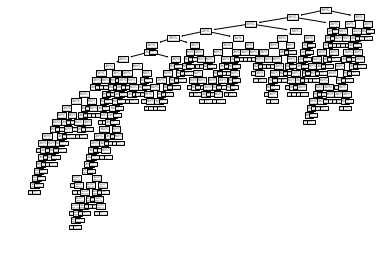

In [15]:
# sklearn decision tree
import pandas as pd
from sklearn import tree

df = pd.read_csv("spambase(1).data", header=None)
df = df.sample(frac=1, random_state=0).reset_index(drop=True)
x = np.array(df[df.columns[:-1]])
y = np.array(df[df.columns[-1]])

# split data
train_size = math.ceil(x.shape[0] * 2/3)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
print("Prediction:", y_pred)
print(clf.score(x_test,y_test))

tree.plot_tree(clf.fit(x_train, y_train)) 
from sklearn.tree import export_graphviz

#### ID3 Algorithm: Refferencing Data Science From Scratch by Joel Grus (Chapter 17: Decision Trees)

In [16]:
import pandas as pd
import numpy as np
import random
import math
import collections
from functools import partial

#Loading spam dataset
spam_data = pd.read_csv('spambase(1).data', header=None)

#Cast the pandas dataframe to matrix array
matrix = np.array(spam_data)

In [17]:
def preprocess_data(data=matrix):

    #Randomizing the data with a seed of zero
    np.random.seed(0)
    np.random.shuffle(data)

    #split the data into train/test (2/3) and (1/3) respectively
    train_size = math.ceil(data.shape[0]*(2/3))
    test_size = data.shape[0] - train_size
    
    #train
    train_data = data[:train_size]
    X_train = train_data[:, 0:train_data.shape[1]-1]
    Y_train = train_data[:, -1]
    
    #test
    test_data = data[train_size:]
    X_test = test_data[:, 0:test_data.shape[1]-1]
    Y_test = test_data[:, -1]

    #compute the mean and standard deviation of the training data
    Mu_X_train = np.mean(X_train, axis = 0)
    Sigma_X_train = np.std(X_train, axis=0, ddof=1)
    
    #Standardizing training and testing data
    X_train = (X_train - Mu_X_train)/Sigma_X_train
    X_test = (X_test - Mu_X_train)/Sigma_X_train

    #Discretizing continuous features of standardized training & testing data by performing binary mapping
    X_train = np.where(X_train >= 0, 1, 0)
    X_test = np.where(X_test >= 0, 1, 0)
    
    return (X_train, X_test, Y_train, Y_test)

In [18]:
#Call the preprocess_data function and unpack the tuple output to obtain the training and testing data
X_train, X_test, Y_train, Y_test = preprocess_data()

In [19]:
def compute_prior_probs(class_labels=Y_train):

    tot_records = len(class_labels)
    
    prior_probs = []
    for class_cnt in collections.Counter(class_labels).values():
        prob = class_cnt/tot_records
        prior_probs.append(prob)
    
    return prior_probs

In [20]:
#default input is Y_train
compute_prior_probs()

[0.4031942633637549, 0.5968057366362451]

In [21]:
def compute_entropy(prior_probs):
    
    entropy = 0
    for p_v in prior_probs:
        entropy += -p_v*np.log2(p_v)
    
    return entropy

In [22]:
compute_entropy(compute_prior_probs())

0.9727884784544674

In [23]:
#create helper func for compute_split_entropy
def compute_data_entropy(labeled_data):
    
    labels = []
    for _, lab in labeled_data:
        labels.append(lab)
    class_probs = compute_prior_probs(labels)
    data_entropy = compute_entropy(class_probs)
    
    return data_entropy

In [24]:
def partition_entropy(subset_data):
    
    tot_cnt = sum(len(subset) for subset in subset_data)
    split_entropy = sum(compute_data_entropy(sub) * len(sub) / tot_cnt for sub in subset_data)
    
    return split_entropy

In [25]:
def shape_input_data(X, train_or_test, Y=None):
    
    row_dicts = []
    
    if train_or_test == 'train': # preserves label as second element of tuple

        for row in range(X.shape[0]):
            row_dict = collections.defaultdict()
            for col in range(X.shape[1]):
                row_dict[col] = X[row, col]
            row_dicts.append((dict(row_dict), [True if Y[row] == 1. else False][0]))
        
    if train_or_test == 'test': # data dict only
        
        for row in range(X.shape[0]):
            row_dict = collections.defaultdict()
            for col in range(X.shape[1]):
                row_dict[col] = X[row, col]
            row_dicts.append((dict(row_dict)))
        
    return row_dicts

In [26]:
#Shaping input and output data for tree building (already standardized and discretized)
train_inputs = shape_input_data(X_train, 'train', Y_train)
test_inputs = shape_input_data(X_test, 'test')

In [27]:
#Helper function for partition_entropy_by
def partition_by(inputs, attribute):
    
    '''Each input is a pair (attribute_dict, label).
     returns a dict : attribute_value --> inputs'''
    
    groups = collections.defaultdict(list)    
    
    for input_ in inputs:        
        key = input_[0][attribute]  # get the value of the specified attribute/feature    
        groups[key].append(input_)  # then add this input to the correct list
    
    return groups

In [28]:
def partition_entropy_by(inputs, attribute):
    
    '''Compute the entropy corresponding to the given partition'''
    
    partitions = partition_by(inputs, attribute)
    
    return partition_entropy(partitions.values())

In [29]:
def build_tree_ID3(inputs, split_candidates=None):
    
    #Fill split_candidates list if empty (first iteration)
    if split_candidates is None:        
        split_candidates = inputs[0][0].keys()
        
    num_inputs = len(inputs)
    num_trues_spam = len([label for item, label in inputs if label])
    num_falses_non_spam = num_inputs - num_trues_spam
    
    #No spam cases, set leaf to False (no spam)
    if num_trues_spam == 0: return False
    #No not spam cases, set leaf to True (spam)
    if num_falses_non_spam == 0: return True
    #No features left for splitting, set leaf to majority
    if not split_candidates:   
        return num_trues_spam >= num_falses_non_spam
    
    #Split on best feature
    best_attribute = min(split_candidates, key=partial(partition_entropy_by, inputs))
    
    partitions = partition_by(inputs, best_attribute)
    
    #Building subtrees:
    new_candidates = [a for a in split_candidates if a != best_attribute]
    
    subtrees = {attribute_value : build_tree_ID3(subset, new_candidates) for attribute_value, subset in partitions.items()}
    subtrees[None] = num_trues_spam > num_falses_non_spam   
    
    return (best_attribute, subtrees)

In [30]:
trained_tree = build_tree_ID3(train_inputs)

In [31]:
def classify_ID3(tree, input_dict):
  
    #Checking for leaf node - no splitting possible, 
    #return leaf value as classification
    if tree in [True, False]:        
        return tree    

    #Splitting possible - traverse subtree of best feature
    attribute, subtree_dict = tree    
    subtree_key = input_dict.get(attribute)
    
    #Use None subtree if no subtree exists for a given feature
    if subtree_key not in subtree_dict:       
        subtree_key = None   
    
    #Choosing subtree for classification
    subtree = subtree_dict[subtree_key]      
    
    return classify_ID3(subtree, input_dict)

In [32]:
def ID3_prediction_performance(tree, input_list):
    '''
    Takes 1) a trained ID3 decistion tree (returned from build_ID3_tree)
    and 2) a list of data dicts (returned from shape_input_data)
    and classifies the list of given input dicts by traversing the 
    trained tree.
    
    Returns the list of predictions and performance metrics:
    percision, recall, f-score, accuracy.
    
    @tree: tuple (best feature, subtrees)
    @input_list: list<dict>
    @return: tuple (list<boolean> (True if predicted spam, False if predicted not spam),
                    np.float (percision),
                    np.float (recall),
                    np.float (f-score),
                    np.float(accuracy))
    '''
    predicted_classes = [classify_ID3(tree, input_list[m]) for m in range(len(input_list))]
    
    label_predictions = [1. if predicted_classes[i] == True else False for i in range(len(predicted_classes))]

    #Calculate performance metrics:    
    TP = np.sum(np.array([1 if label_predictions[i] == Y_test[i] else 0 for i in range(len(Y_test))]))

    FP = np.sum(np.array([1 if label_predictions[i] == 1 and Y_test[i] == 0 else 0 for i in range(len(Y_test))]))

    FN = np.sum(np.array([1 if label_predictions[i] == 0 and Y_test[i] == 1 else 0 for i in range(len(Y_test))]))

    TN = np.sum(np.array([1 if label_predictions[i] == 0 and Y_test[i] ==0 else 0 for i in range(len(Y_test))]))

    #Percision
    percision = TP/(TP + FP)

    #Recall
    recall = TP/(TP + FN)

    #F-measure
    f_score = (2*percision*recall)/(percision + recall)

    #Accuracy
    accuracy = (TN + TP) / (TN + TP + FN + FP)

    return (label_predictions, percision, recall, f_score, accuracy)

In [33]:
#Call the final ID3 function from the decision tree pipeline and return the evaluation metrics of the model

tree_predictions, tree_percision, tree_recall, tree_f_score, tree_accuracy = ID3_prediction_performance(trained_tree, test_inputs)

print('Accuracy:', tree_accuracy)
print('Precision:', tree_percision)
print('Recall:', tree_recall)
print('F1-Score:', tree_f_score)

Accuracy: 0.9439834024896265
Precision: 0.945872801082544
Recall: 0.9621472814865795
F1-Score: 0.9539406345957011
